In [190]:
# Импорт библиотек
import math
import numpy as np
from matplotlib import pyplot as plt


In [191]:
# Инициализация параметров и выбор функции
functionName = 'Goldman-Price' 
#functionName = 'Rosenbrock'
#functionName = 'Himmelblau'
#functionName = 'StyblinskiTank'
epoch = 3000
learning_rate = 0.01
beta = 0.9
beta1Adam = 0.9
beta2Adam = 0.99
a = 0.001

# Параметры функции
if functionName == 'Himmelblau':
  n = 10
  min_X = -5
  max_X = 5
if functionName == 'StyblinskiTank':
  n = 10
  min_X = -5
  max_X = 5
if functionName == 'Rosenbrock':
  n = 0.1
  min_X = -2
  max_X = 2
if functionName == 'Goldman-Price':
  n = 0.1
  min_X = -1.5
  max_X = 0.5


In [192]:
# Целевые функции
# Функция Химмельблау
def himmelblau(x, y):
  return ((x**2 + y - 11)**2) + ((x + y**2 - 7)**2)
def himmelblauGradient(x, y, grad_x):
  if grad_x is True:
    return 4 * x * (x**2 + y - 11) + (2 * x + 2 * y**2 - 14)
  else:
    return 2 * x**2 + 4 * y * (x + y**2 - 7) + 2 * y - 22

# Функция Styblinski-Tank
def styblinskiTank(x, y):
  return 0.5 * (x**4 - 16 * x**2 + 5 * x) + (y**4 - 16 * y**2 + 5 * y)
def styblinskiTankGradient(x, y, grad_x):
  if grad_x is True:
    return 2 * x**3 - 16 * x + 2.5
  else:
    return 2 * y**3 - 16 * y + 2.5

# Функция Розенброка
def rosenbrock(x, y):
  return (1 - x)**2 + 100 * (y - x**2)**2 
def rosenbrockGradient(x, y, grad_x):
  if grad_x is True:
    return -400 * x * (y - x**2) + 2 * x - 2
  else: 
    return -200 * x**2 + 200 * y   

# Функция Гольдман-Прайса
def goldemanPrice(x, y):
  pow_x_to_2 = x**2
  pow_y_to_2 = y**2
  a = 1 + ((x + y + 1)**2) * (19 - 14 * x + 3 * pow_x_to_2 - 14 * y + 6 * x * y + 3 * pow_y_to_2)
  b = 30 + ((2 * x - 3 * y)**2) * (18 - 32 * x + 12 * pow_x_to_2 + 48 * y - 36 * x * y + 27 * pow_y_to_2)
  return a * b
def goldemanPriceGradient(x, y, grad_x):
  pow_x_to_2 = x**2
  pow_y_to_2 = y**2
  if grad_x is True:
    return ((3 * pow_x_to_2 + 6 * x * y - 14 * x + 3 * pow_y_to_2 - 14 * y + 19) * (x + y + 1)**2 + 1) * (4 * (12 * pow_x_to_2 - 36 * x * y - 32 * x + 27 * pow_y_to_2 + 48 * y + 18) * (2 * x - 3 * y) + (24 * x - 36 * y - 32) * (2 * x - 3 * y)**2) + (2 * (3 * pow_x_to_2 + 6 * x * y - 14 * x + 3 * pow_y_to_2 - 14 * y + 19) * (x + y + 1) + (6 * x + 6 * y - 14) * (x + y + 1)**2) * ((12 * pow_x_to_2 - 36 * x * y - 32 * x + 27 * pow_y_to_2 + 48 * y + 18) * (2 * x - 3 * y)**2 + 30)
  else:
    return ((3 * pow_x_to_2 + 6 * x * y - 14 * x + 3 * pow_y_to_2 - 14 * y + 19) * (x + y + 1)**2 + 1) * ((2 * x - 3 * y)**2 * (-36 * x + 54 * y + 48) - 6 * (2 * x - 3 * y) * (12 * pow_x_to_2 - 36 * x * y - 32 * x + 27 * pow_y_to_2 + 48 * y + 18)) + (2 * (3 * pow_x_to_2 + 6 * x * y - 14 * x + 3 * pow_y_to_2 - 14 * y + 19) * (x + y + 1) + (6 * x + 6 * y - 14) * (x + y + 1)**2) * ((12 * pow_x_to_2 - 36 * x * y - 32 * x + 27 * pow_y_to_2 + 48 * y + 18) * (2 * x - 3 * y)**2 + 30)



In [193]:
# Обрез градиента
def gradient_cut(grad_x, grad_y, n):
  return (n / math.sqrt(math.pow(grad_x, 2) + math.pow(grad_y, 2))) * n    
# Выбор функции градиента  
def gradient_func(x, y, n):
  if functionName == 'Himmelblau':
    return himmelblauGradient(x, y, n)
  if functionName == 'StyblinskiTank':
    return styblinskiTankGradient(x, y, n)
  if functionName == 'Rosenbrock':
    return rosenbrockGradient(x, y, n)
  if functionName == 'Goldman-Price':
    return goldemanPriceGradient(x, y, n)
# Расчет переменных функции    
def func_const(x, y):
  if functionName == 'Himmelblau':
    return himmelblau(x, y)
  if functionName == 'StyblinskiTank':
    return styblinskiTank(x, y)
  if functionName == 'Rosenbrock':
    return rosenbrock(x, y)
  if functionName == 'Goldman-Price':
    return goldemanPrice(x, y)

In [194]:
# Оптимизаторы
def sgd():
  local_x = 0
  local_y = 0
  x_list = [local_x]
  y_list = [local_y]
  for i in range(epoch):
    step_x = learning_rate * gradient_func(local_x, local_y, True)
    step_y = learning_rate * gradient_func(local_x, local_y, False)
    if step_x >= n:
      step_x = gradient_cut(step_x, step_y, a)
    if step_x <= -n: 
      step_x = -gradient_cut(step_x, step_y, a)
    if step_y >= n: 
      step_y = gradient_cut(step_x, step_y, a)
    if step_y <= -n: 
      step_y = -gradient_cut(step_x, step_y, a)
    local_x -= step_x
    local_y -= step_y
    x_list.append(round(local_x, 4))
    y_list.append(round(local_y, 4))
  return np.array(x_list), np.array(y_list)
  
def momentum():
  local_x = 0
  local_y = 0
  V_x = 0
  V_y = 0
  x_list = [local_x]
  y_list = [local_y]
  for i in range(epoch):
    V_x = beta * V_x + (1 - beta) * gradient_func(local_x, local_y, True)
    V_y = beta * V_y + (1 - beta) * gradient_func(local_x, local_y, False)
    step_x = learning_rate * V_x
    step_y = learning_rate * V_y
    if step_x >= n:
      step_x = gradient_cut(step_x, step_y, a)
    if step_x <= -n: 
      step_x = -gradient_cut(step_x, step_y, a)
    if step_y >= n: 
      step_y = gradient_cut(step_x, step_y, a)
    if step_y <= -n: 
      step_y = -gradient_cut(step_x, step_y, a)
    local_x -= step_x
    local_y -= step_y
    x_list.append(round(local_x, 4))
    y_list.append(round(local_y, 4))
  return np.array(x_list), np.array(y_list)

def rmsprop():
  local_x = 0 
  local_y = 0
  S_x = 0
  S_y = 0
  x_list = [local_x]
  y_list = [local_y]
  for i in range(epoch):
    gradientCalculation1 = gradient_func(local_x, local_y, True)
    gradientCalculation2 = gradient_func(local_x, local_y, False)
    S_x = beta * S_x + ((1 - beta) * gradientCalculation1**2)
    S_y = beta * S_y + ((1 - beta) * gradientCalculation2**2)
    step_x = learning_rate * (gradientCalculation1 / (math.sqrt(S_x) + a))
    step_y = learning_rate * (gradientCalculation2 / (math.sqrt(S_y) + a))
    local_x -= step_x
    local_y -= step_y
    x_list.append(round(local_x, 4))
    y_list.append(round(local_y, 4))
  return np.array(x_list), np.array(y_list)

def adam():
  local_x = 0
  local_y = 0
  V_x = 0
  V_y = 0
  S_x = 0
  S_y = 0
  x_list = [local_x]
  y_list = [local_y]
  for era in range(epoch):
    gradientCalculation1 = gradient_func(local_x, local_y, True)
    gradientCalculation2 = gradient_func(local_x, local_y, False)
    V_x = beta1Adam * V_x + (1 - beta1Adam) * gradientCalculation1
    V_y = beta1Adam * V_y + (1 - beta1Adam) * gradientCalculation2
    S_x = (beta2Adam * S_x + (1 - beta2Adam) * gradientCalculation1**2)
    S_y = (beta2Adam * S_y + (1 - beta2Adam) * gradientCalculation2**2)
    pow_beta1_to_era = beta1Adam**(era + 1)
    pow_beta2_to_era = beta2Adam**(era + 1)
    V_x_corr = V_x / (1 - pow_beta1_to_era)
    V_y_corr = V_y / (1 - pow_beta1_to_era)
    S_x_corr = S_x / (1 - pow_beta2_to_era)
    S_y_corr = S_y / (1 - pow_beta2_to_era)
    step_x = learning_rate * (V_x_corr / (math.sqrt(S_x_corr) + a))
    step_y = learning_rate * (V_y_corr / (math.sqrt(S_y_corr) + a))
    local_x -= step_x
    local_y -= step_y
    x_list.append(round(local_x, 4))
    y_list.append(round(local_y, 4))
  return np.array(x_list), np.array(y_list)


In [195]:
# Функция отрисовки градиента
def gradientVisualization(x1, x2, y, x1_list, x2_list):
  fig, ax = plt.subplots()
  cf = ax.contourf(x1, x2,y,80,cmap='jet')
  ax.contour(x1, x2,y,25,colors='white',linestyles='solid',linewidths=0.5)
  cb = fig.colorbar(cf,orientation='vertical',extend='both')
  cb.set_label('Cost', labelpad=-40, y=1.03,fontsize=15,rotation=0)
  fig.set_figwidth(12)
  fig.set_figheight(10)
  ax.set_title('Функция - ' + functionName,fontsize=15)
  ax.set_xlabel("w1", fontsize="12")
  ax.set_ylabel("w2", fontsize="12")
  ax.plot(0, 'ro', markersize=15)
  for func_x1, func_x2, legend, color in zip(x1_list,x2_list,["gd", "momentu", "rmsprop", "adam"],["green", "purple", "orange", "yellow"],):
    ax.plot(func_x1, func_x2, linewidth="3", color=color, label=legend)
  ax.legend()
  plt.show()

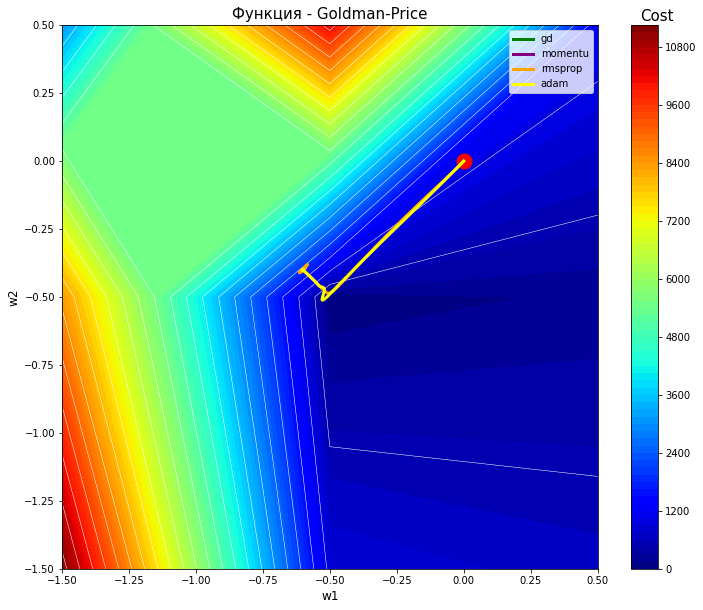

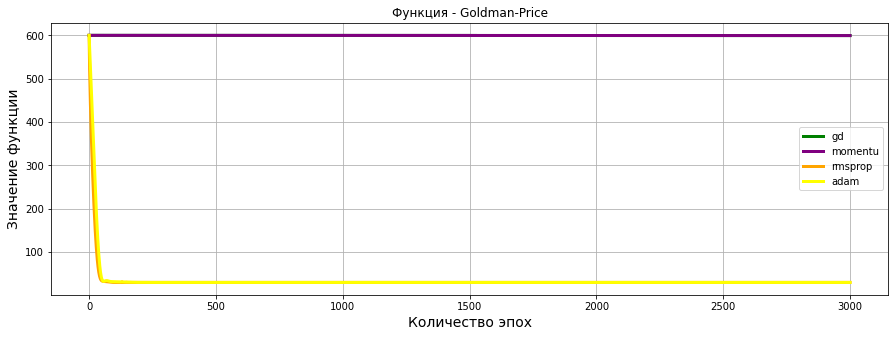

In [196]:
# Применение методов оптимизации
gd_x1, gd_x2 = sgd()
mgd_x1, mgd_x2 = momentum()
rms_x1, rms_x2 = rmsprop()
ad_x1, ad_x2 = adam()
result_x1 = [gd_x1, mgd_x1, rms_x1, ad_x1]
result_x2 = [gd_x2, mgd_x2, rms_x2, ad_x2]
# Отрисовка градиента
coord_x1, coord_x2 = np.meshgrid(np.arange(min_X, max_X + 1), np.arange(min_X, max_X + 1))
func_dist = func_const(coord_x1, coord_x2)
gradientVisualization(coord_x1, coord_x2, func_dist, result_x1, result_x2)
x_arrange = np.arange(epoch + 1)
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)
ax.set_title('Функция - ' + functionName)
ax.set_xlabel("Количество эпох", fontsize=14)
ax.set_ylabel("Значение функции", fontsize=14)
ax.plot(x_arrange,func_const(gd_x1, gd_x2),label = "gd",color = "green",linewidth = "3")
ax.plot(x_arrange,func_const(mgd_x1, mgd_x2),label = "momentu",color = "purple",linewidth = "3")
ax.plot(x_arrange,func_const(rms_x1, rms_x2),label = "rmsprop",color = "orange",linewidth = "3")
ax.plot(x_arrange,func_const(ad_x1, ad_x2),label = "adam",color = "yellow",linewidth = "3")
ax.legend()
ax.grid()

